In [1]:
import numpy as np
from numpy import array, pi
import matplotlib.pyplot as plt
from tqdm import tqdm

from FFT import FFT2, IFFT2
from utils import re_scale, freq_padding, blockshaped, img_shift

In [2]:
image_path_list = ['baboon', 'F16', 'lena', 'Noisy']
image_list = [np.fromfile("./data/"+path+".raw", dtype=np.uint8).reshape(512, 512) for path in image_path_list]

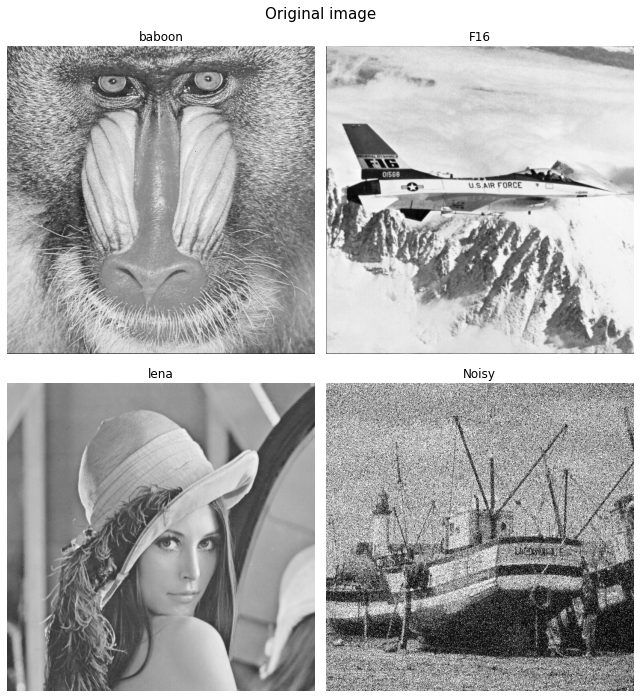

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Original image", size=15)
fig.tight_layout()
plt.show()

In [4]:
padding_image_list = []
for sub_image in image_list:
    padding_image_list.append(freq_padding(sub_image))

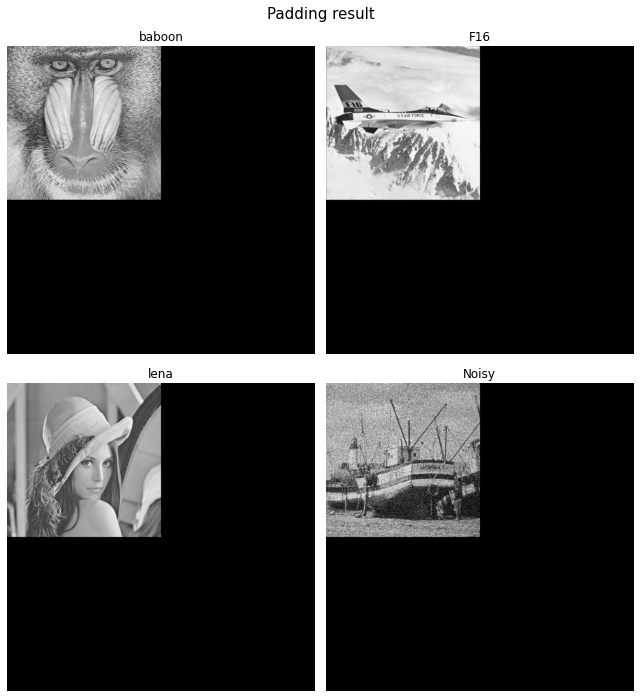

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(padding_image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Padding result", size=15)
fig.tight_layout()
plt.show()

In [6]:
freq_map_image_list = [FFT2(sub_image) for sub_image in padding_image_list]

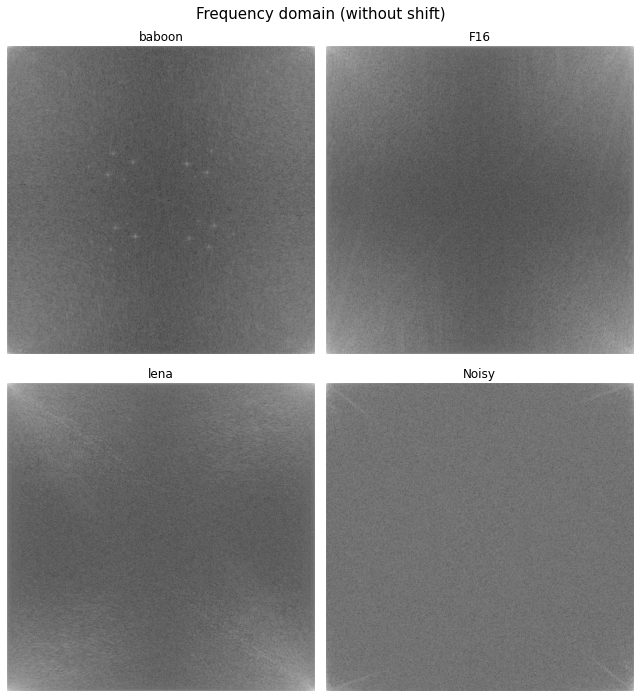

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.log(abs(freq_map_image_list[i])), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Frequency domain (without shift)", size=15)
fig.tight_layout()
plt.show()

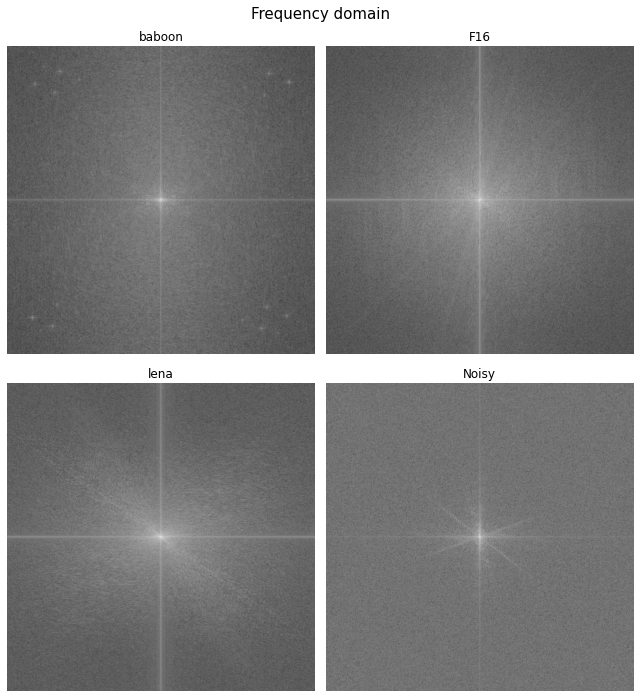

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.log(abs(img_shift(freq_map_image_list[i]))), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Frequency domain", size=15)
fig.tight_layout()
plt.show()

In [10]:
invf_image_list = [IFFT2(sub_map) for sub_map in freq_map_image_list]

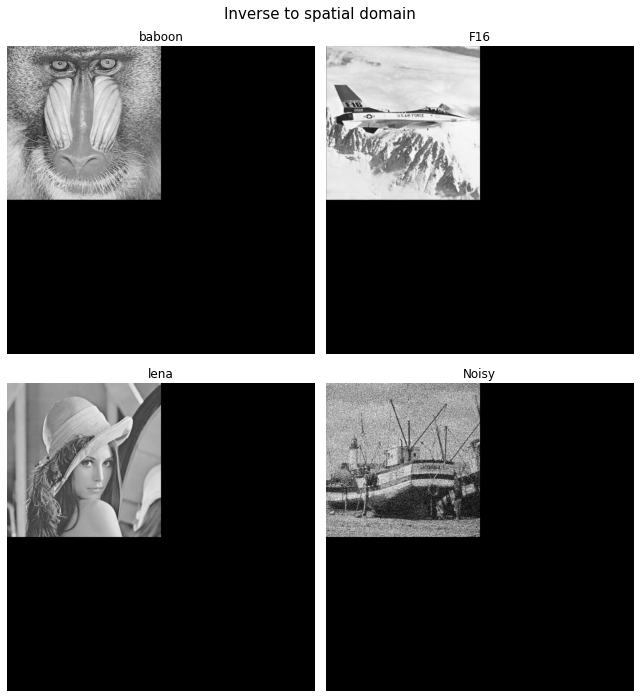

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(abs(invf_image_list[i]), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Inverse to spatial domain", size=15)
fig.tight_layout()
plt.show()

In [ ]:
from freq_pass_filter import ideal_low_pass, gaussian_low_pass, butterworth_low_pass, ideal_high_pass, butterworth_high_pass

In [41]:
temp_image = abs(img_shift(freq_map_image_list[0]) * butterworth_low_pass(freq_map_image_list[0],D0=10,n=4))

In [42]:
temp_image[temp_image > 0] = np.log(temp_image[temp_image > 0])

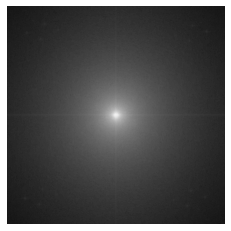

In [43]:
plt.imshow(temp_image, cmap="gray")
plt.axis("off")
plt.show()